In [ ]:
import numpy as np
import pandas as pd

Change of basis using numpy:



1.   B1 = old basis, V1 = old basis representation
2.   B2 = new basis, V2 = new basis representation

New Basis = M * Old Basis

M = B2 inverse * B1

Hence,
      V2 = M * V1






In [ ]:
### Old Basis
B1 = np.array([[1,0],[0,1]])
B1

array([[1, 0],
       [0, 1]])

In [ ]:
### New Basis
B2 = np.array([[1,1],[2,3]])
B2

array([[1, 1],
       [2, 3]])

In [ ]:
### Finding M
### Since B1 is an identity matrix M is just the inverse of B2
M = np.linalg.inv(B2)
M

array([[ 3., -1.],
       [-2.,  1.]])

In [ ]:
### Old basis representation
V1 = np.array([[4],[9]])
V1

array([[4],
       [9]])

In [ ]:
### New Basis representation
V2 = M @ V1
V2

array([[3.],
       [1.]])

# **PCA Working**

1. Covariance Matrix




In [ ]:
a = [[2,1],[3,2],[2,1],[5,1]]
b =['X','Y']
data = pd.DataFrame(a,columns = b)
data

,X,Y
0,2,1
1,3,2
2,2,1
3,5,1


In [ ]:
np.cov(data.T)

array([[2.  , 0.  ],
       [0.  , 0.25]])

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/mnt/c/Users/Ashwin/Documents/Ash/Projects/ML/Data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
x = data.drop(['Species','Id'],axis=1)
y = data.pop('Species')
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [ ]:
pca = PCA(random_state=42)
pca.fit(X)
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [ ]:
print("the actual eigenvalues (variance):",pca.explained_variance_)

the actual eigenvalues (variance): [2.93035378 0.92740362 0.14834223 0.02074601]


explained_variance_ratio_ = explained_variance_ / np.sum(explained_variance_)

In [ ]:
print("the percentage of the variance: ",pca.explained_variance_ratio_)

the percentage of the variance:  [0.72770452 0.23030523 0.03683832 0.00515193]


In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
import plotly.express as px

px.line(x=range(1,len(cumulative_variance)+1) , y=cumulative_variance, title="Scree Plot" ,labels=dict(x="Principal_Components", y="Cumulative Variance"))

In [ ]:
pc2 = PCA(n_components=2,random_state=42)
transformed = pc2.fit_transform(X)
transformed.shape

(150, 2)

Making the new tranformed data into a dataframe

In [ ]:
df = pd.DataFrame(transformed,columns=['PC1','PC2'])
df.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
y = pd.DataFrame(y,columns=['Species'])

In [ ]:
df_final = pd.concat([df,y],axis=1)
df_final.head()

,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [ ]:
features = ['PC1','PC2']
fig = px.scatter_matrix(
    df_final,
    dimensions=features,
    color="Species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

Building a Model using PCA

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ML & AI Data (Practice Data)/churn_data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ML & AI Data (Practice Data)/customer_data.csv')
df3 = pd.read_csv('/content/drive/MyDrive/ML & AI Data (Practice Data)/internet_data.csv')

In [ ]:
df_merge = pd.merge(df1,df2,how='inner',on='customerID')
df_merge.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [ ]:
telecom = pd.merge(df_merge,df3,how='inner',on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [ ]:
###Grtting a list of all columns with data type as object
dtype = list(telecom.select_dtypes(['object']).columns)
dtype

['customerID',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn',
 'gender',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [ ]:
### Filtering the object columns with only two unique values
for i in dtype:
  x =list(telecom.columns[telecom.nunique() == 2])
x

['PhoneService',
 'PaperlessBilling',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents']

In [ ]:
### mapping the object columns with only two unique values with 1 & 0
for i in x:
  telecom[i] = telecom[i].map({'Yes':1,'No':0})


In [ ]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,NaN,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,NaN,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,NaN,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,NaN,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,NaN,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            0 non-null      float64
 10  SeniorCitizen     0 non-null      float64
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [ ]:
remaining = list(telecom.select_dtypes(['object']).columns)
remaining

['customerID',
 'Contract',
 'PaymentMethod',
 'TotalCharges',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [ ]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'.
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'.
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'.
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local

In [ ]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          0 non-null      float64
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [ ]:
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,0.0,7032.000000
mean,32.371149,64.761692,NaN,2283.300441
std,24.559481,30.090047,NaN,2266.771362
min,0.000000,18.250000,NaN,18.800000
25%,9.000000,35.500000,NaN,401.450000
50%,29.000000,70.350000,NaN,1397.475000
75%,55.000000,89.850000,NaN,3794.737500
90%,69.000000,102.600000,NaN,5976.640000
95%,72.000000,107.400000,NaN,6923.590000
99%,72.000000,114.729000,NaN,8039.883000


In [ ]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                                 0.00
tenure                                     0.00
PhoneService                               0.00
PaperlessBilling                           0.00
MonthlyCharges                             0.00
TotalCharges                               0.16
Churn                                      0.00
SeniorCitizen                            100.00
Partner                                    0.00
Dependents                                 0.00
Contract_One year                          0.00
Contract_Two year                          0.00
PaymentMethod_Credit card (automatic)      0.00
PaymentMethod_Electronic check             0.00
PaymentMethod_Mailed check                 0.00
MultipleLines_No                           0.00
MultipleLines_Yes                          0.00
InternetService_Fiber optic                0.00
InternetService_No                         0.00
OnlineSecurity_No                          0.00
OnlineSecurity_Yes                      

In [ ]:
telecom = telecom.drop('SeniorCitizen',axis=1)

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_No                          0.00
OnlineBackup_Yes                  

In [ ]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [ ]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]
normalized_df=(df-df.mean())/df.std()
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)
telecom = pd.concat([telecom,normalized_df],axis=1)
telecom.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,customerID,PhoneService,PaperlessBilling,Churn,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,1,0,0,0,0,1,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,1,0,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,1,0,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


In [ ]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

y.head()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4900
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2012.5
Date:                Sun, 20 Mar 2022   Deviance:                       4025.0
Time:                        04:16:39   Pearson chi2:                 6.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.1161      1.181     -2.639      0.008      -5.431      -0.801
PhoneService                              0.7460      0.586      1.274      0.203      -0.402       1.894
PaperlessBilling                          0.3445      0.090      3.838      0.000       0.169       0.520
Partner                                   0.0736      0.093      0.792      0.429      -0.109       0.256
Dependents                               -0.2160      0.106     -2.044      0.041      -0.423      -0.009
Contract_One year                        -0.6902      0.128     -5.374      0.000      -0.942      -0.438
Contract_Two year                        -1.3024      0.212     -6.157      0.000      -1.717      -0.888
PaymentMethod_Credit card (automatic)    -0.2515      0.137     -1.842      0.065      -0.519       0.016
PaymentMethod_Electronic check            0.1760      0.112      1.567      0.117      -0.044       0.396
PaymentMethod_Mailed check               -0.2710      0.137     -1.974      0.048      -0.540      -0.002
MultipleLines_No                          0.0924      0.204      0.453      0.650      -0.307       0.492
MultipleLines_Yes                         0.6536      0.391      1.673      0.094      -0.112       1.419
InternetService_Fiber optic               2.4415      0.963      2.536      0.011       0.555       4.328
InternetService_No                       -3.2646      1.318     -2.477      0.013      -5.848      -0.682
OnlineSecurity_No                         0.1006      0.058      1.741      0.082      -0.013       0.214
OnlineSecurity_Yes                        0.0479      0.173      0.277      0.782      -0.292       0.387
OnlineBackup_No                           0.0010      0.054      0.018      0.986      -0.105       0.107
OnlineBackup_Yes                          0.1475      0.172      0.860      0.390      -0.189       0.484
DeviceProtection_No                      -0.0760      0.056     -1.366      0.172      -0.185       0.033
DeviceProtection_Yes                      0.2245      0.173      1.296      0.195      -0.115       0.564
TechSupport_No                            0.1116      0.058      1.928      0.054      -0.002       0.225
TechSupport_Yes                           0.0369      0.173      0.213      0.831      -0.303       0.376
StreamingTV_No                           -0.3842      0.132     -2.909      0.004      -0.643      -0.125
StreamingTV_Yes                           0.5326      0.266      2.006      0.045       0.012       1.053
StreamingMovies_No                       -0.3301      0.132     -2.504      0.012      -0.589      -0.072
StreamingMovies_Yes                       0.4786      0.265      1.804      0.071      -0.041       0.999
tenure   

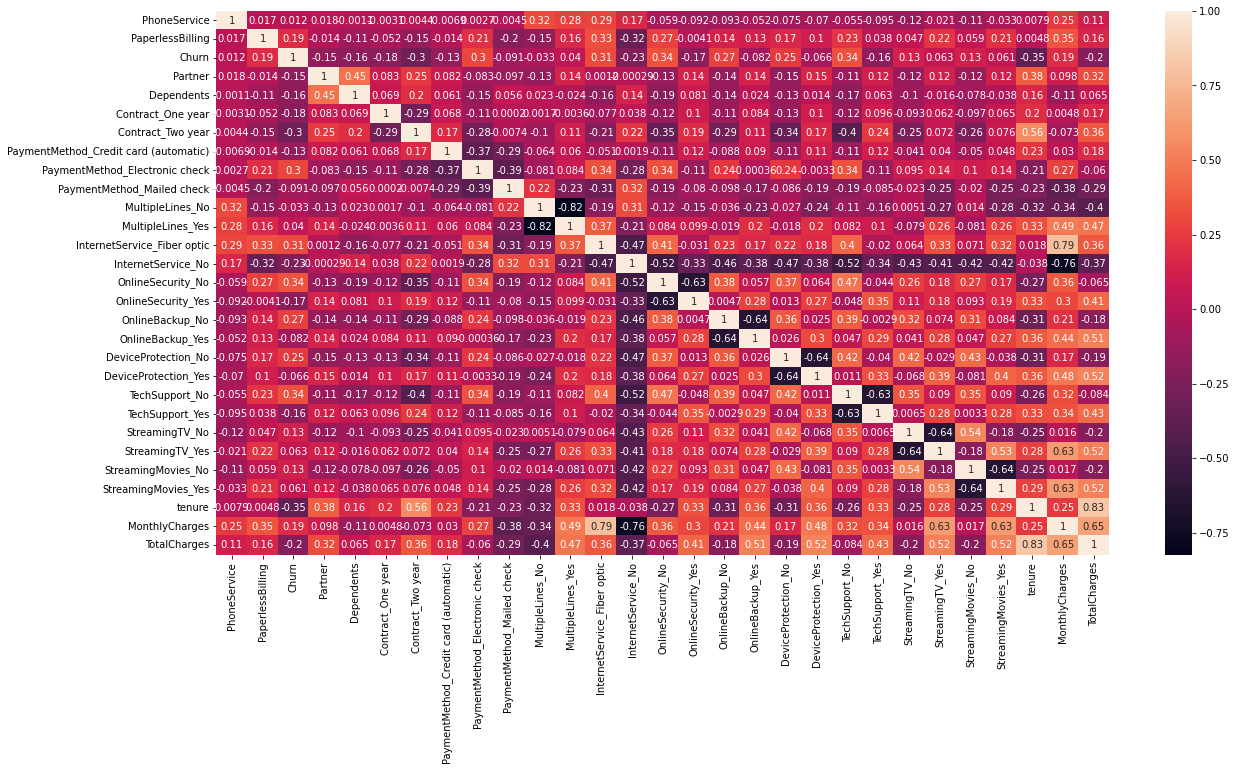

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

In [ ]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



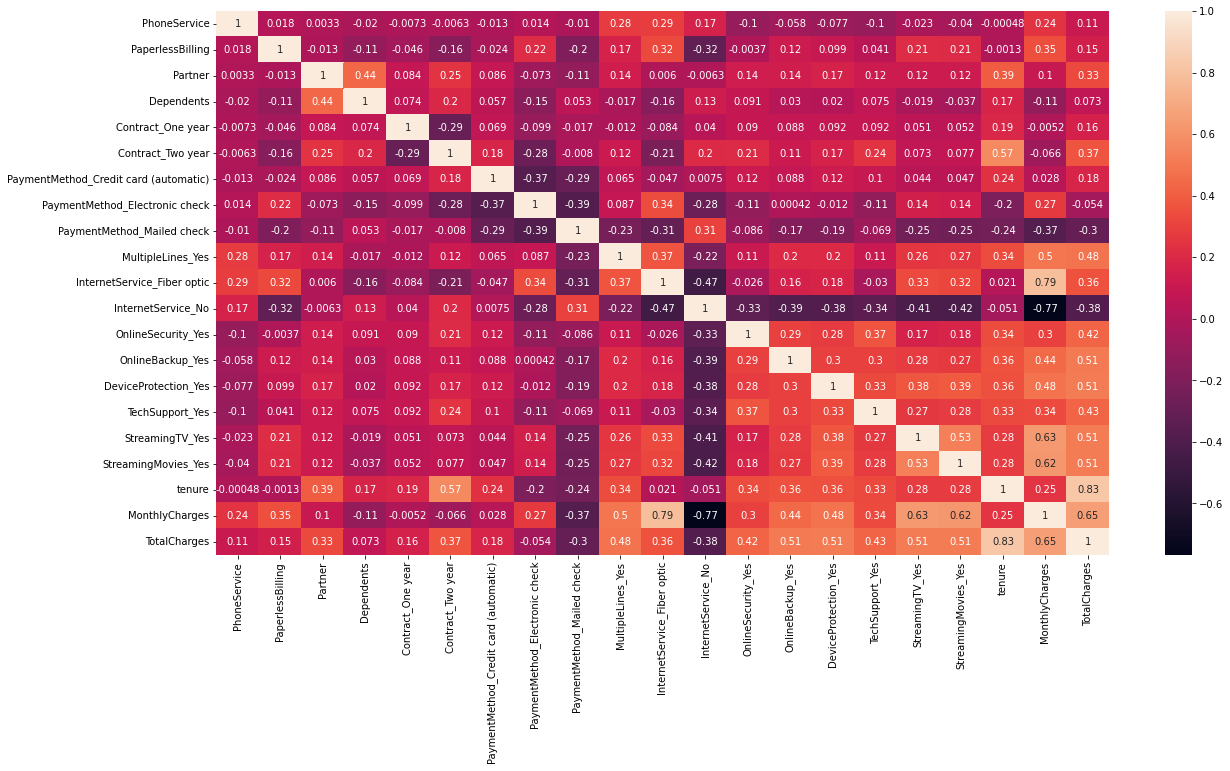

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

In [ ]:
logm2 = sm.GLM(y_train,sm.add_constant(X_train2),family = sm.families.Binomial())
logm2.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4900
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2012.5
Date:                Sun, 20 Mar 2022   Deviance:                       4025.0
Time:                        04:16:48   Pearson chi2:                 6.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.6933      1.537     -2.403      0.016      -6.705      -0.681
PhoneService                              0.8384      0.785      1.068      0.286      -0.700       2.377
PaperlessBilling                          0.3445      0.090      3.838      0.000       0.169       0.520
Partner                                   0.0736      0.093      0.792      0.429      -0.109       0.256
Dependents                               -0.2160      0.106     -2.044      0.041      -0.423      -0.009
Contract_One year                        -0.6902      0.128     -5.374      0.000      -0.942      -0.438
Contract_Two year                        -1.3024      0.212     -6.157      0.000      -1.717      -0.888
PaymentMethod_Credit card (automatic)    -0.2515      0.137     -1.842      0.065      -0.519       0.016
PaymentMethod_Electronic check            0.1760      0.112      1.567      0.117      -0.044       0.396
PaymentMethod_Mailed check               -0.2710      0.137     -1.974      0.048      -0.540      -0.002
MultipleLines_Yes                         0.5611      0.213      2.635      0.008       0.144       0.979
InternetService_Fiber optic               2.4415      0.963      2.536      0.011       0.555       4.328
InternetService_No                       -2.6874      0.977     -2.750      0.006      -4.603      -0.772
OnlineSecurity_Yes                       -0.0527      0.215     -0.244      0.807      -0.475       0.370
OnlineBackup_Yes                          0.1465      0.211      0.695      0.487      -0.267       0.560
DeviceProtection_Yes                      0.3005      0.214      1.403      0.161      -0.119       0.720
TechSupport_Yes                          -0.0746      0.215     -0.346      0.729      -0.497       0.348
StreamingTV_Yes                           0.9168      0.394      2.324      0.020       0.144       1.690
StreamingMovies_Yes                       0.8087      0.394      2.052      0.040       0.036       1.581
tenure                                   -1.5048      0.189     -7.956      0.000      -1.876      -1.134
MonthlyCharges                           -2.0575      1.155     -1.781      0.075      -4.321       0.207
TotalCharges                              0.7422      0.197      3.759      0.000       0.355       1.129
=========================================================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe =  rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[False  True False False  True  True False  True False  True False  True
  True  True False False False False False  True False False  True False
  True  True  True  True]
[ 3  1 15  2  1  1  9  1 10  1 14  1  1  1  5  4 13  7  8  1  6 12  1 11
  1  1  1  1]


In [ ]:
### RFE Selected Columns
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [ ]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
model = logm3.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.2
Date:                Sun, 20 Mar 2022   Deviance:                       4048.4
Time:                        04:16:50   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0162      0.169     -6.017      0.000      -1.347      -0.685
PhoneService                      -0.3090      0.173     -1.784      0.074      -0.648       0.030
PaperlessBilling                   0.3595      0.089      4.029      0.000       0.185       0.534
Contract_One year                 -0.7012      0.127     -5.516      0.000      -0.950      -0.452
Contract_Two year                 -1.3187      0.210     -6.271      0.000      -1.731      -0.907
PaymentMethod_Electronic check     0.3668      0.083      4.446      0.000       0.205       0.529
MultipleLines_No                  -0.2311      0.095     -2.435      0.015      -0.417      -0.045
InternetService_Fiber optic        0.7937      0.116      6.836      0.000       0.566       1.021
InternetService_No                -1.1832      0.182     -6.484      0.000      -1.541      -0.826
OnlineSecurity_Yes                -0.4107      0.102     -4.031      0.000      -0.610      -0.211
TechSupport_Yes                   -0.4181      0.101     -4.135      0.000      -0.616      -0.220
StreamingMovies_No                -0.2024      0.094     -2.160      0.031      -0.386      -0.019
tenure                            -1.4974      0.181     -8.251      0.000      -1.853      -1.142
TotalCharges                       0.7373      0.186      3.965      0.000       0.373       1.102
==================================================================================================
"""

In [ ]:
### SkLearn Model
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1000000000.0)

In [ ]:
y_pred = logsk.predict_proba(X_test[col])
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_df.head()

,1
0,0.504794
1,0.380392
2,0.005072
3,0.643860
4,0.006286


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
942,0
3730,1
1761,0
2283,1
1872,0


In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.504794
1,3730,1,0.380392
2,1761,0,0.005072
3,2283,1,0.643860
4,1872,0,0.006286


In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.504794,1
1,3730,1,0.380392,0
2,1761,0,0.005072,0
3,2283,1,0.643860,1
4,1872,0,0.006286,0


In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1359,  169],
       [ 255,  327]])

In [ ]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.7990521327014218

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_pred_final.Churn, y_pred_final.Churn_Prob)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

Building the Model inted of PCA

In [ ]:
X_train.shape

(4922, 28)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(random_state=42)

In [ ]:
pca.components_

array([[ 1.75823955e-02,  6.68442574e-02,  9.83666680e-02,
         1.51094641e-02,  3.01943442e-02,  8.09824196e-02,
         4.47125518e-02,  9.74417219e-03, -9.62117005e-02,
        -1.44861127e-01,  1.62443523e-01,  1.37702124e-01,
        -1.23123160e-01,  9.96847301e-03,  1.13154687e-01,
        -2.99006534e-02,  1.53023813e-01, -3.72597033e-02,
         1.60382863e-01,  1.40769197e-03,  1.21715468e-01,
        -5.23588605e-02,  1.75482020e-01, -5.35814258e-02,
         1.76704586e-01,  4.51306103e-01,  4.63908215e-01,
         5.65105032e-01],
       [-1.59590694e-02, -1.51634666e-01,  1.11019108e-01,
         1.14245292e-01,  5.68542047e-02,  1.99104472e-01,
         6.98520468e-02, -1.94990017e-01,  7.23686316e-02,
         3.67379592e-02, -5.26970286e-02, -2.54372169e-01,
         2.30743918e-01, -2.80747809e-01,  5.00038908e-02,
        -2.29899377e-01, -8.44540552e-04, -2.31063082e-01,
         3.19164544e-04, -2.75049693e-01,  4.43057754e-02,
        -1.49160407e-01, -8.15

In [ ]:
pca.explained_variance_ratio_

array([3.42494484e-01, 1.82826106e-01, 6.30980975e-02, 4.71158739e-02,
       3.88773433e-02, 3.60592948e-02, 3.35706581e-02, 3.25020710e-02,
       3.12025331e-02, 2.80514253e-02, 2.63141361e-02, 2.56358233e-02,
       2.47733969e-02, 2.38064020e-02, 2.20632599e-02, 1.38340152e-02,
       8.92166343e-03, 7.45641436e-03, 6.20344201e-03, 5.14520189e-03,
       4.83580498e-05, 5.76204201e-32, 3.14287502e-32, 2.44787049e-32,
       9.72366403e-33, 6.15861184e-33, 3.45806142e-33, 2.13967934e-33])

In [ ]:
varcumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
import plotly.express as px

px.line(x=range(1,len(varcumu)+1) , y=varcumu, title="Scree Plot" ,labels=dict(x="Principal_Components", y="Cumulative Variance"))

Perform PCA with 16 components

In [ ]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=16)
train_pca = ipca.fit_transform(X_train)

In [ ]:
train_pca.shape

(4922, 16)

In [ ]:
### Creating a corr matrix
corr = np.corrcoef(train_pca.transpose())
corr.shape

(16, 16)

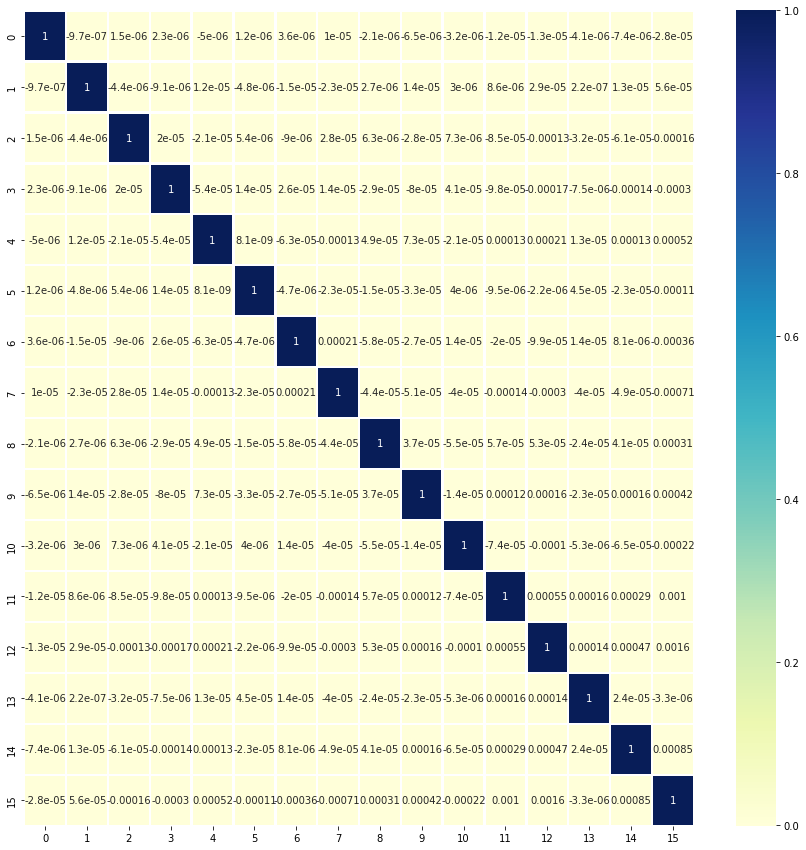

In [ ]:
plt.figure(figsize=[15,15])
sns.heatmap(corr,annot=True,linewidths=1.5,cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LogisticRegression
plr = LogisticRegression()

In [ ]:
model = plr.fit(train_pca,y_train)

In [ ]:
test_pca = ipca.transform(X_test)

In [ ]:
predict_proabs = model.predict_proba(test_pca)
metrics.roc_auc_score(y_test,predict_proabs[:,1])

0.8270969396016624